In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
house = pd.read_excel('Historic_clean.xlsx')

In [3]:
#split the dependent variable and independent variable
house_X =  house.copy()
house_X.drop(['SalePrice'],axis=1,inplace=True)
house_y = house['SalePrice']

In [4]:
house_x= house_X.iloc[:,:].values

In [5]:
type(house_x)

numpy.ndarray

In [6]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,agebybuilt,agebyremodel,TotalGrBsmtSF,OA2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,5,5,2566,3310
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,31,31,2524,2984
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,7,6,2706,3476
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,91,36,2473,3115
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,8,8,3343,4529


In [7]:
house.drop(['Id'],axis=1,inplace=True)
house.drop(['MSSubClass'],axis=1,inplace=True)
house.drop(['Heating'],axis=1,inplace=True)
house.drop(['Functional'],axis=1,inplace=True)
house.drop(['RoofMatl'],axis=1,inplace=True)
house.drop(['MiscFeature'],axis=1,inplace=True)

In [8]:
house.shape

(1460, 75)

In [9]:
#split the dependent variable and independent variable
house_X =  house.copy()
house_X.drop(['SalePrice'],axis=1,inplace=True)
house_y = house['SalePrice']

In [10]:
house_x= house_X.iloc[:,:].values

In [11]:
list(house_x[1,:])

['RL',
 80.0,
 9600,
 'Pave',
 nan,
 'Reg',
 'Lvl',
 'AllPub',
 'FR2',
 'Gtl',
 'Veenker',
 'Feedr',
 'Norm',
 '1Fam',
 '1Story',
 6,
 1976,
 1976,
 'Gable',
 'MetalSd',
 'MetalSd',
 nan,
 0,
 'TA',
 'TA',
 'CBlock',
 'Gd',
 'TA',
 'Gd',
 'ALQ',
 978,
 'Unf',
 284,
 1262,
 'Ex',
 'Y',
 'SBrkr',
 1262,
 0,
 1262,
 1262,
 2240,
 0,
 2.0,
 2.5,
 3,
 1,
 'TA',
 7,
 6,
 1,
 'TA',
 'Attchd',
 1976,
 'RFn',
 2,
 'TA',
 'TA',
 'Y',
 298,
 0,
 0,
 0,
 nan,
 nan,
 0,
 5,
 2007,
 'WD',
 'Normal',
 31,
 31,
 2524,
 2984]

In [12]:
#list all the categorical variables
columns_ohe = [0,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23,24,25,26,27,28,29,31,34,35,36,47,51,52,54,56,57,58,63,64,68,69]

In [13]:
list(house_x[1,[0,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23,24,25,26,27,28,29,31,34,35,36,47,51,52,54,56,57,58,63,64,68,69]])

['RL',
 'Pave',
 nan,
 'Reg',
 'Lvl',
 'AllPub',
 'FR2',
 'Gtl',
 'Veenker',
 'Feedr',
 'Norm',
 '1Fam',
 '1Story',
 'Gable',
 'MetalSd',
 'MetalSd',
 nan,
 'TA',
 'TA',
 'CBlock',
 'Gd',
 'TA',
 'Gd',
 'ALQ',
 'Unf',
 'Ex',
 'Y',
 'SBrkr',
 'TA',
 'TA',
 'Attchd',
 'RFn',
 'TA',
 'TA',
 'Y',
 nan,
 nan,
 'WD',
 'Normal']

In [14]:
for num in tqdm(columns_ohe):
    dummy_ = pd.get_dummies(house_x[:,num],sparse=True)
    if(num!=0):
        dummy = np.concatenate((dummy,dummy_),axis=1)
    else:
        dummy = dummy_

100%|██████████| 39/39 [00:00<00:00, 1214.68it/s]


In [15]:
dupe = np.delete(house_x,columns_ohe,1)

In [16]:
dupe = np.concatenate((dupe,dummy),axis=1)

In [17]:
list(dupe[1,:])

[80.0,
 9600,
 6,
 1976,
 1976,
 0,
 978,
 284,
 1262,
 1262,
 0,
 1262,
 1262,
 2240,
 0,
 2.0,
 2.5,
 3,
 1,
 7,
 6,
 1,
 1976,
 2,
 298,
 0,
 0,
 0,
 0,
 5,
 2007,
 31,
 31,
 2524,
 2984,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,

In [18]:
house_x = np.delete(house_x,columns_ohe,1)

In [19]:
house_x = np.concatenate((house_x,dummy),axis=1)

In [20]:
list(house_x[1,:])

[80.0,
 9600,
 6,
 1976,
 1976,
 0,
 978,
 284,
 1262,
 1262,
 0,
 1262,
 1262,
 2240,
 0,
 2.0,
 2.5,
 3,
 1,
 7,
 6,
 1,
 1976,
 2,
 298,
 0,
 0,
 0,
 0,
 5,
 2007,
 31,
 31,
 2524,
 2984,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,

In [21]:
np.random.seed(0)
number_of_samples = len(house_x)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.80)
house_x_train = house_x[random_indices[:num_training_samples]]
house_y_train=house_y[random_indices[:num_training_samples]]
house_x_validation=house_x[random_indices[num_training_samples:]]
house_y_validation=house_y[random_indices[num_training_samples:]]

In [22]:
len(house_x_train)

1168

In [23]:
len(house_y_train)

1168

In [24]:
len(house_x_validation)

292

In [25]:
len(house_y_validation)

292

In [27]:
house_future = pd.read_excel('Furture_data_clean.xlsx')

In [28]:
house_future.drop(['Id'],axis=1,inplace=True)
house_future.drop(['MSSubClass'],axis=1,inplace=True)
house_future.drop(['Heating'],axis=1,inplace=True)
house_future.drop(['Functional'],axis=1,inplace=True)
house_future.drop(['RoofMatl'],axis=1,inplace=True)
house_future.drop(['MiscFeature'],axis=1,inplace=True)

In [29]:
house_future.head(1)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,agebybuilt,agebyremodel,TotalGrBsmtSF,OA2
0,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,0,6,2010,WD,Normal,49,49,1778,2508


In [30]:
house_future= house_future.iloc[:,:].values

In [31]:
type(house_future)

numpy.ndarray

In [32]:
house_future.shape

(1459, 74)

In [33]:
#list all the categorical variables
columns_ohe = [0,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23,24,25,26,27,28,29,31,34,35,36,47,51,52,54,56,57,58,63,64,68,69]

In [34]:
list(house_future[1,[0,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23,24,25,26,27,28,29,31,34,35,36,47,51,52,54,56,57,58,63,64,68,69]])

['RL',
 'Pave',
 nan,
 'IR1',
 'Lvl',
 'AllPub',
 'Corner',
 'Gtl',
 'Names',
 'Norm',
 'Norm',
 '1Fam',
 '1Story',
 'Hip',
 'Wd Sdng',
 'Wd Sdng',
 'BrkFace',
 'TA',
 'TA',
 'CBlock',
 'TA',
 'TA',
 'No',
 'ALQ',
 'Unf',
 'TA',
 'Y',
 'SBrkr',
 'Gd',
 nan,
 'Attchd',
 'Unf',
 'TA',
 'TA',
 'Y',
 nan,
 nan,
 'WD',
 'Normal']

In [35]:
for num in tqdm(columns_ohe):
    dummy_ = pd.get_dummies(house_future[:,num],sparse=True)
    if(num!=0):
        dummy = np.concatenate((dummy,dummy_),axis=1)
    else:
        dummy = dummy_

100%|██████████| 39/39 [00:00<00:00, 1053.42it/s]


In [36]:
dupe = np.delete(house_future,columns_ohe,1)

In [37]:
dupe = np.concatenate((dupe,dummy),axis=1)

In [38]:
list(dupe[1,:])

[81.0,
 14267,
 6,
 1958,
 1958,
 108,
 923,
 406,
 1329,
 1329,
 0,
 1329,
 1329,
 2252,
 0,
 1.5,
 1.5,
 3,
 1,
 6,
 6,
 0,
 1958,
 1,
 393,
 36,
 36,
 0,
 12500,
 6,
 2010,
 52,
 52,
 2658,
 3078,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True

In [39]:
house_future = np.delete(house_future,columns_ohe,1)

In [40]:
house_future = np.concatenate((house_future,dummy),axis=1)

In [41]:
list(house_future[1,:])

[81.0,
 14267,
 6,
 1958,
 1958,
 108,
 923,
 406,
 1329,
 1329,
 0,
 1329,
 1329,
 2252,
 0,
 1.5,
 1.5,
 3,
 1,
 6,
 6,
 0,
 1958,
 1,
 393,
 36,
 36,
 0,
 12500,
 6,
 2010,
 52,
 52,
 2658,
 3078,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True

In [42]:
house_x_test=house_future

In [43]:
len(house_x_test)

1459

# Standard Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(house_x_train)
# Apply transform to both the training set and the valdation set.
house_x_train = scaler.transform(house_x_train)
house_x_validation = scaler.transform(house_x_validation)

# Apply transform to future data that is the test set.
house_x_test = scaler.transform(house_x_test)

In [45]:
house_x_train.shape

(1168, 261)

In [46]:
house_x_validation.shape

(292, 261)

In [47]:
house_x_test.shape

(1459, 261)

# PCA

In [48]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(house_x_train)
house_x_train = pca.transform(house_x_train)
house_x_validation = pca.transform(house_x_validation)

# Apply PCA to future data that is the test set.
house_x_test = pca.transform(house_x_test)

In [49]:
house_x_train.shape

(1168, 158)

In [50]:
house_x_validation.shape

(292, 158)

In [51]:
house_x_test.shape

(1459, 158)

In [52]:
R2_train = []
R2_valid = []
R2_test = []

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(house_x_train, house_y_train)
house_linear_train_predicted = model.predict(house_x_train)
house_linear_validation_predicted = model.predict(house_x_validation)

In [54]:
from sklearn.metrics import r2_score,mean_squared_error
r2_train_score = r2_score(house_y_train,house_linear_train_predicted)
r2_test_score = r2_score(house_y_validation, house_linear_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 723889958.38
Validation data - Mean squared error: 900923846.41
Training data Coefficient of determination: 0.89
Validation data Coefficient of determination: 0.82


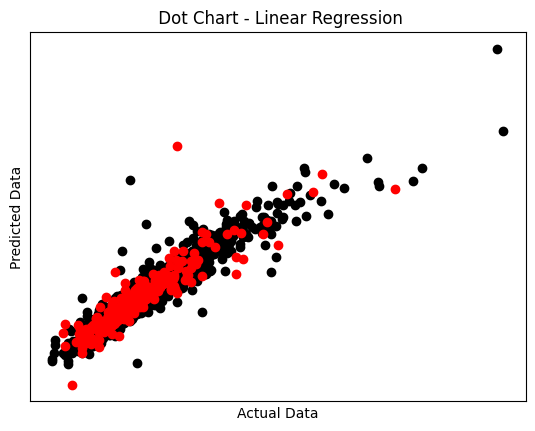

In [55]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, house_linear_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation, house_linear_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(house_y_train, house_linear_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(house_y_validation, house_linear_validation_predicted))

# Plot outputs
plt.scatter(house_y_train, house_linear_train_predicted, color="black")
plt.scatter(house_y_validation, house_linear_validation_predicted, color="red")

#plt.plot(cars_y_validation, cars_linear_validation_predicted, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart - Linear Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

In [56]:
from sklearn.tree import DecisionTreeRegressor

decision = DecisionTreeRegressor(random_state=0)
decision.fit(house_x_train, house_y_train,)
decision_train_predicted = decision.predict(house_x_train)
decision_validation_predicted = decision.predict(house_x_validation)

In [57]:
r2_train_score = r2_score(house_y_train, decision_train_predicted,)
r2_test_score = r2_score(house_y_validation, decision_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

In [58]:
r2_score(house_y_train, decision_train_predicted)

1.0

In [59]:
r2_score(house_y_validation, decision_validation_predicted)

0.7083591001648217

Training data -Mean squared error: 0.00
Validation data - Mean squared error: 1436448965.26
Training data Coefficient of determination: 1.00
Validation data Coefficient of determination: 0.71


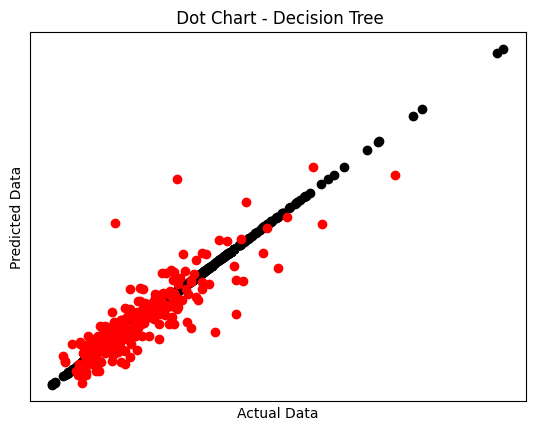

In [60]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, decision_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation, decision_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(house_y_train, decision_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(house_y_validation, decision_validation_predicted))

# Plot outputs


plt.scatter(house_y_train, decision_train_predicted, color="black")
plt.scatter(house_y_validation, decision_validation_predicted, color="red")


#plt.plot

plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart - Decision Tree")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [62]:
rf_rs

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]})

In [63]:
rf_rs.fit(house_x_train, house_y_train)
rf_rs.best_params_

{'n_estimators': 700,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 8}

In [64]:
house_random_train_predicted = rf_rs.predict(house_x_train)
house_random_validation_predicted = rf_rs.predict(house_x_validation)

In [65]:
r2_score(house_y_train, house_random_train_predicted)

0.7461234288233451

In [66]:
r2_score(house_y_validation, house_random_validation_predicted)

0.597875685352319

In [67]:
r2_train_score = r2_score(house_y_train, house_random_train_predicted)
r2_test_score = r2_score(house_y_validation, house_random_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 1680546768.95
Validation data - Mean squared error: 1980624308.89
Training data Coefficient of determination: 0.75
Validation data Coefficient of determination: 0.60


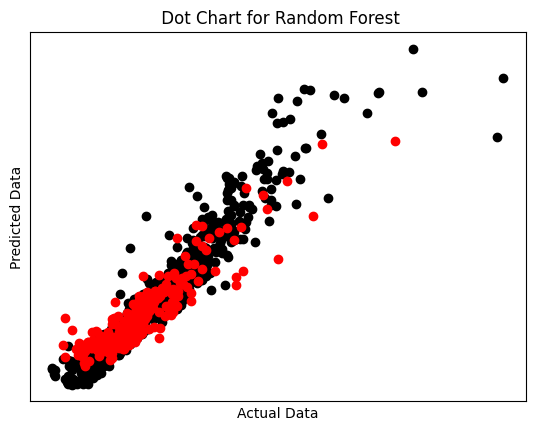

In [68]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, house_random_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation, house_random_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(house_y_train, house_random_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(house_y_validation, house_random_validation_predicted))

# Plot outputs
plt.scatter(house_y_train, house_random_train_predicted, color="black")
plt.scatter(house_y_validation, house_random_validation_predicted, color="red")



plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart for Random Forest")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

In [70]:
ls_rs.fit(house_x_train,house_y_train)
ls_rs.best_params_

{'alpha': 1000.0}

In [71]:
house_lasso_train_predicted = ls_rs.predict(house_x_train)
house_lasso_validation_predicted = ls_rs.predict(house_x_validation)

In [72]:
r2_score(house_y_train,house_lasso_train_predicted)

0.8752319317159633

In [73]:
r2_score(house_y_validation, house_lasso_validation_predicted)

0.8546839457713808

In [74]:
r2_train_score = r2_score(house_y_train, house_lasso_train_predicted)
r2_test_score = r2_score(house_y_validation, house_lasso_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 825907538.65
Validation data - Mean squared error: 715740130.58
Training data R2 Score: 0.88
Validation data R2 Score: 0.85


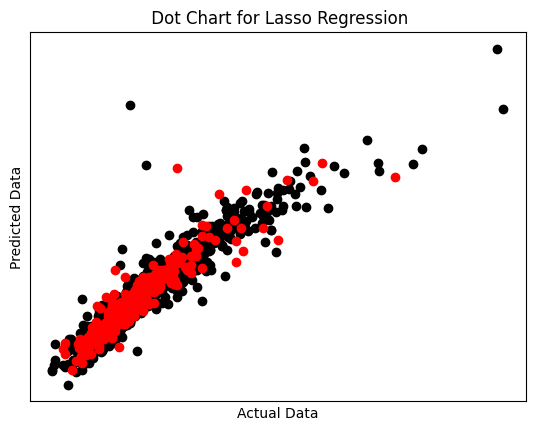

In [75]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, house_lasso_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation, house_lasso_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(house_y_train, house_lasso_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(house_y_validation, house_lasso_validation_predicted))

# Plot outputs
plt.scatter(house_y_train, house_lasso_train_predicted, color="black")
plt.scatter(house_y_validation, house_lasso_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart for Lasso Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

# Ridge Regression

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

In [77]:
rg_rs.fit(house_x_train, house_y_train)
rg_rs.best_params_

{'alpha': 1000.0}

In [78]:
house_ridge_train_predicted = rg_rs.predict(house_x_train)
house_ridge_validation_predicted = rg_rs.predict(house_x_validation)

In [79]:
r2_score(house_y_train, house_ridge_train_predicted)

0.872562461103013

In [80]:
r2_score(house_y_validation, house_ridge_validation_predicted)

0.8578902156421805

In [81]:
r2_train_score = r2_score(house_y_train, house_ridge_train_predicted)
r2_test_score = r2_score(house_y_validation, house_ridge_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 843578213.00
Validation data - Mean squared error: 699947959.32
Training data R2 Score: 0.87
Validation data R2 Score: 0.86


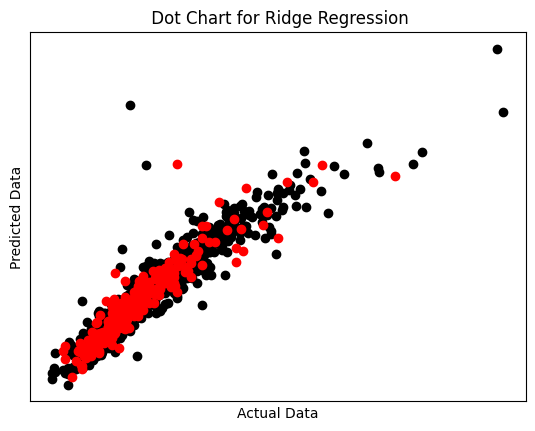

In [82]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(house_y_train, house_ridge_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(house_y_validation, house_ridge_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(house_y_train, house_ridge_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(house_y_validation, house_ridge_validation_predicted))

# Plot outputs
plt.scatter(house_y_train, house_ridge_train_predicted, color="black")
plt.scatter(house_y_validation,house_ridge_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart for Ridge Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

In [83]:
Technique = ["Linear Regression", "Decision Tree","Random Forest Regression","Lasso Regression","Ridge Regression"]
results=pd.DataFrame({'Model': Technique,'R Squared ( Train )': R2_train,'R Squared ( Validation )': R2_test})
display(results)

,Model,R Squared ( Train ),R Squared ( Validation )
0,Linear Regression,0.89,0.82
1,Decision Tree,1.00,0.71
2,Random Forest Regression,0.75,0.60
3,Lasso Regression,0.88,0.85
4,Ridge Regression,0.87,0.86


# Ridge Regression is the best Regressor so using it for pridicting the future data 

In [84]:
house_test_predicted = rg_rs.predict(house_x_test)

In [85]:
house_test_predicted

array([138517.96687288, 164963.95087747, 187829.16643854, ...,
       162907.02708624, 117050.44812123, 204237.28439317])

In [86]:
house_x_test.shape

(1459, 158)

In [87]:
predictions_df = pd.DataFrame({'Predicted_Price': house_test_predicted})
predictions_df.to_csv('predicted_prices.csv', index=False)

In [88]:
Pedicted_future = pd.read_excel('Furture_data_clean.xlsx')

In [89]:
Pedicted_future['Predicted_Price'] = house_test_predicted

# Save the DataFrame with predicted prices to a CSV file
Pedicted_future.to_csv('test_data_with_predictions.csv', index=False)

# Now your 'house_x_test' DataFrame has an additional column 'Predicted_Price'
Pedicted_future.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,agebybuilt,agebyremodel,TotalGrBsmtSF,OA2,Predicted_Price
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,49,49,1778,2508,138517.966873
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,52,52,2658,3078,164963.950877
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,13,12,2557,3039,187829.166439
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,12,12,2530,3020,183587.578736
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,18,18,2560,3066,193708.357725


# <font color = maroon>Data exploration and visualization for Predicted data 

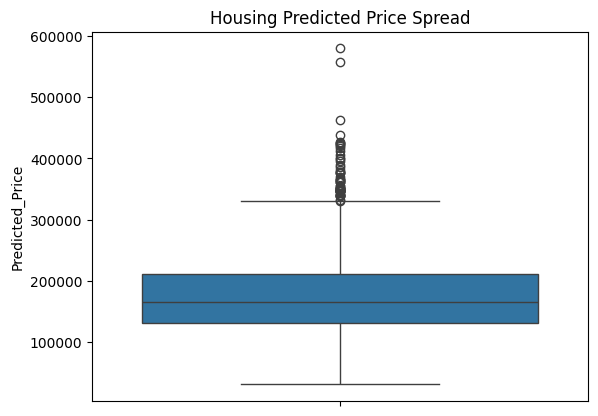

count      1459.000000
mean     178891.445250
std       69971.633524
min       31142.666609
25%      131116.780577
50%      165441.858532
75%      210867.161810
max      579647.346142
Name: Predicted_Price, dtype: float64


In [90]:
plt.title('Housing Predicted Price Spread')
sns.boxplot(y=Pedicted_future.Predicted_Price)
plt.show()
print(Pedicted_future.Predicted_Price.describe())

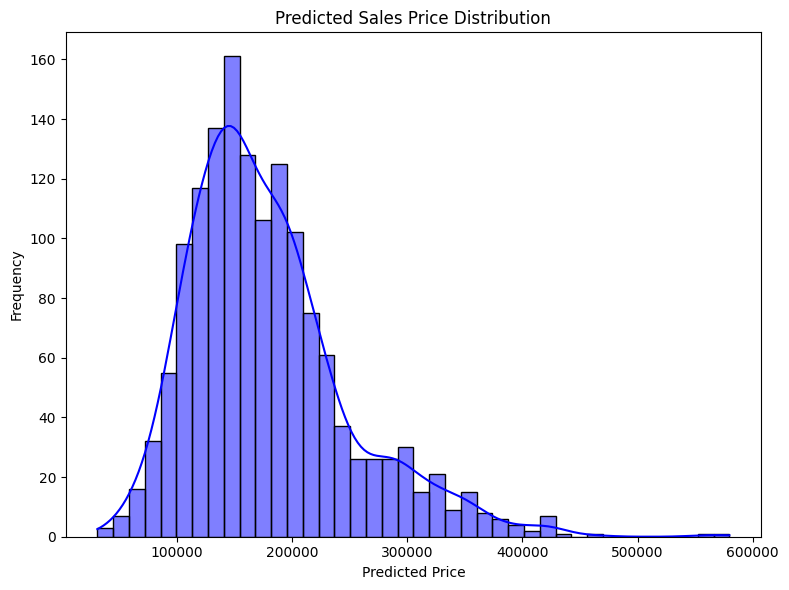

In [91]:
plt.figure(figsize=(8, 6))
plt.title('Predicted Sales Price Distribution')
sns.histplot(Pedicted_future['Predicted_Price'], kde=True, color='blue')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

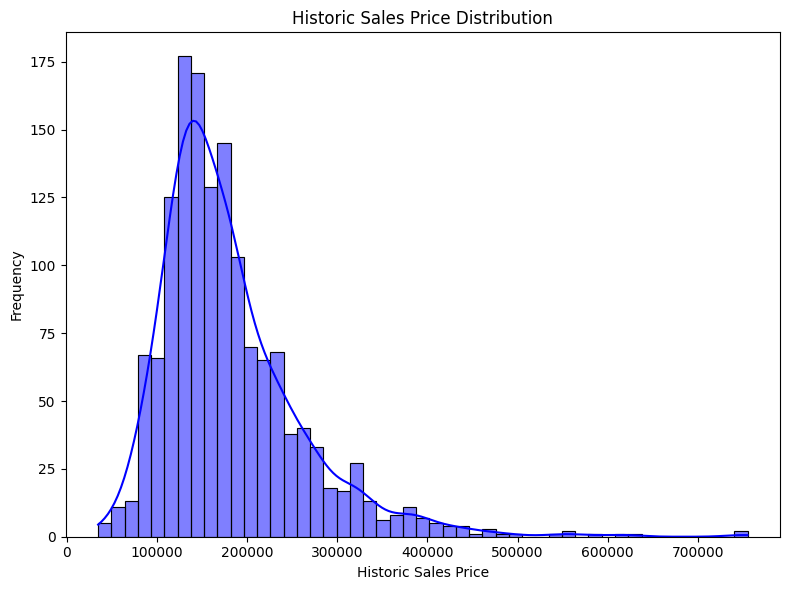

In [92]:
plt.figure(figsize=(8, 6))
plt.title('Historic Sales Price Distribution')
sns.histplot(house['SalePrice'], kde=True, color='blue')
plt.xlabel('Historic Sales Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

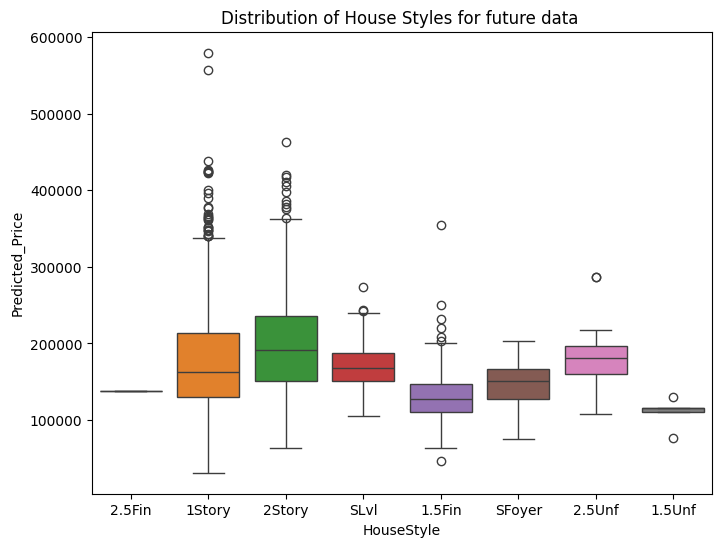

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Pedicted_future,x='HouseStyle', y='Predicted_Price', hue="HouseStyle",dodge=False)
title = plt.title('Distribution of House Styles for future data ')

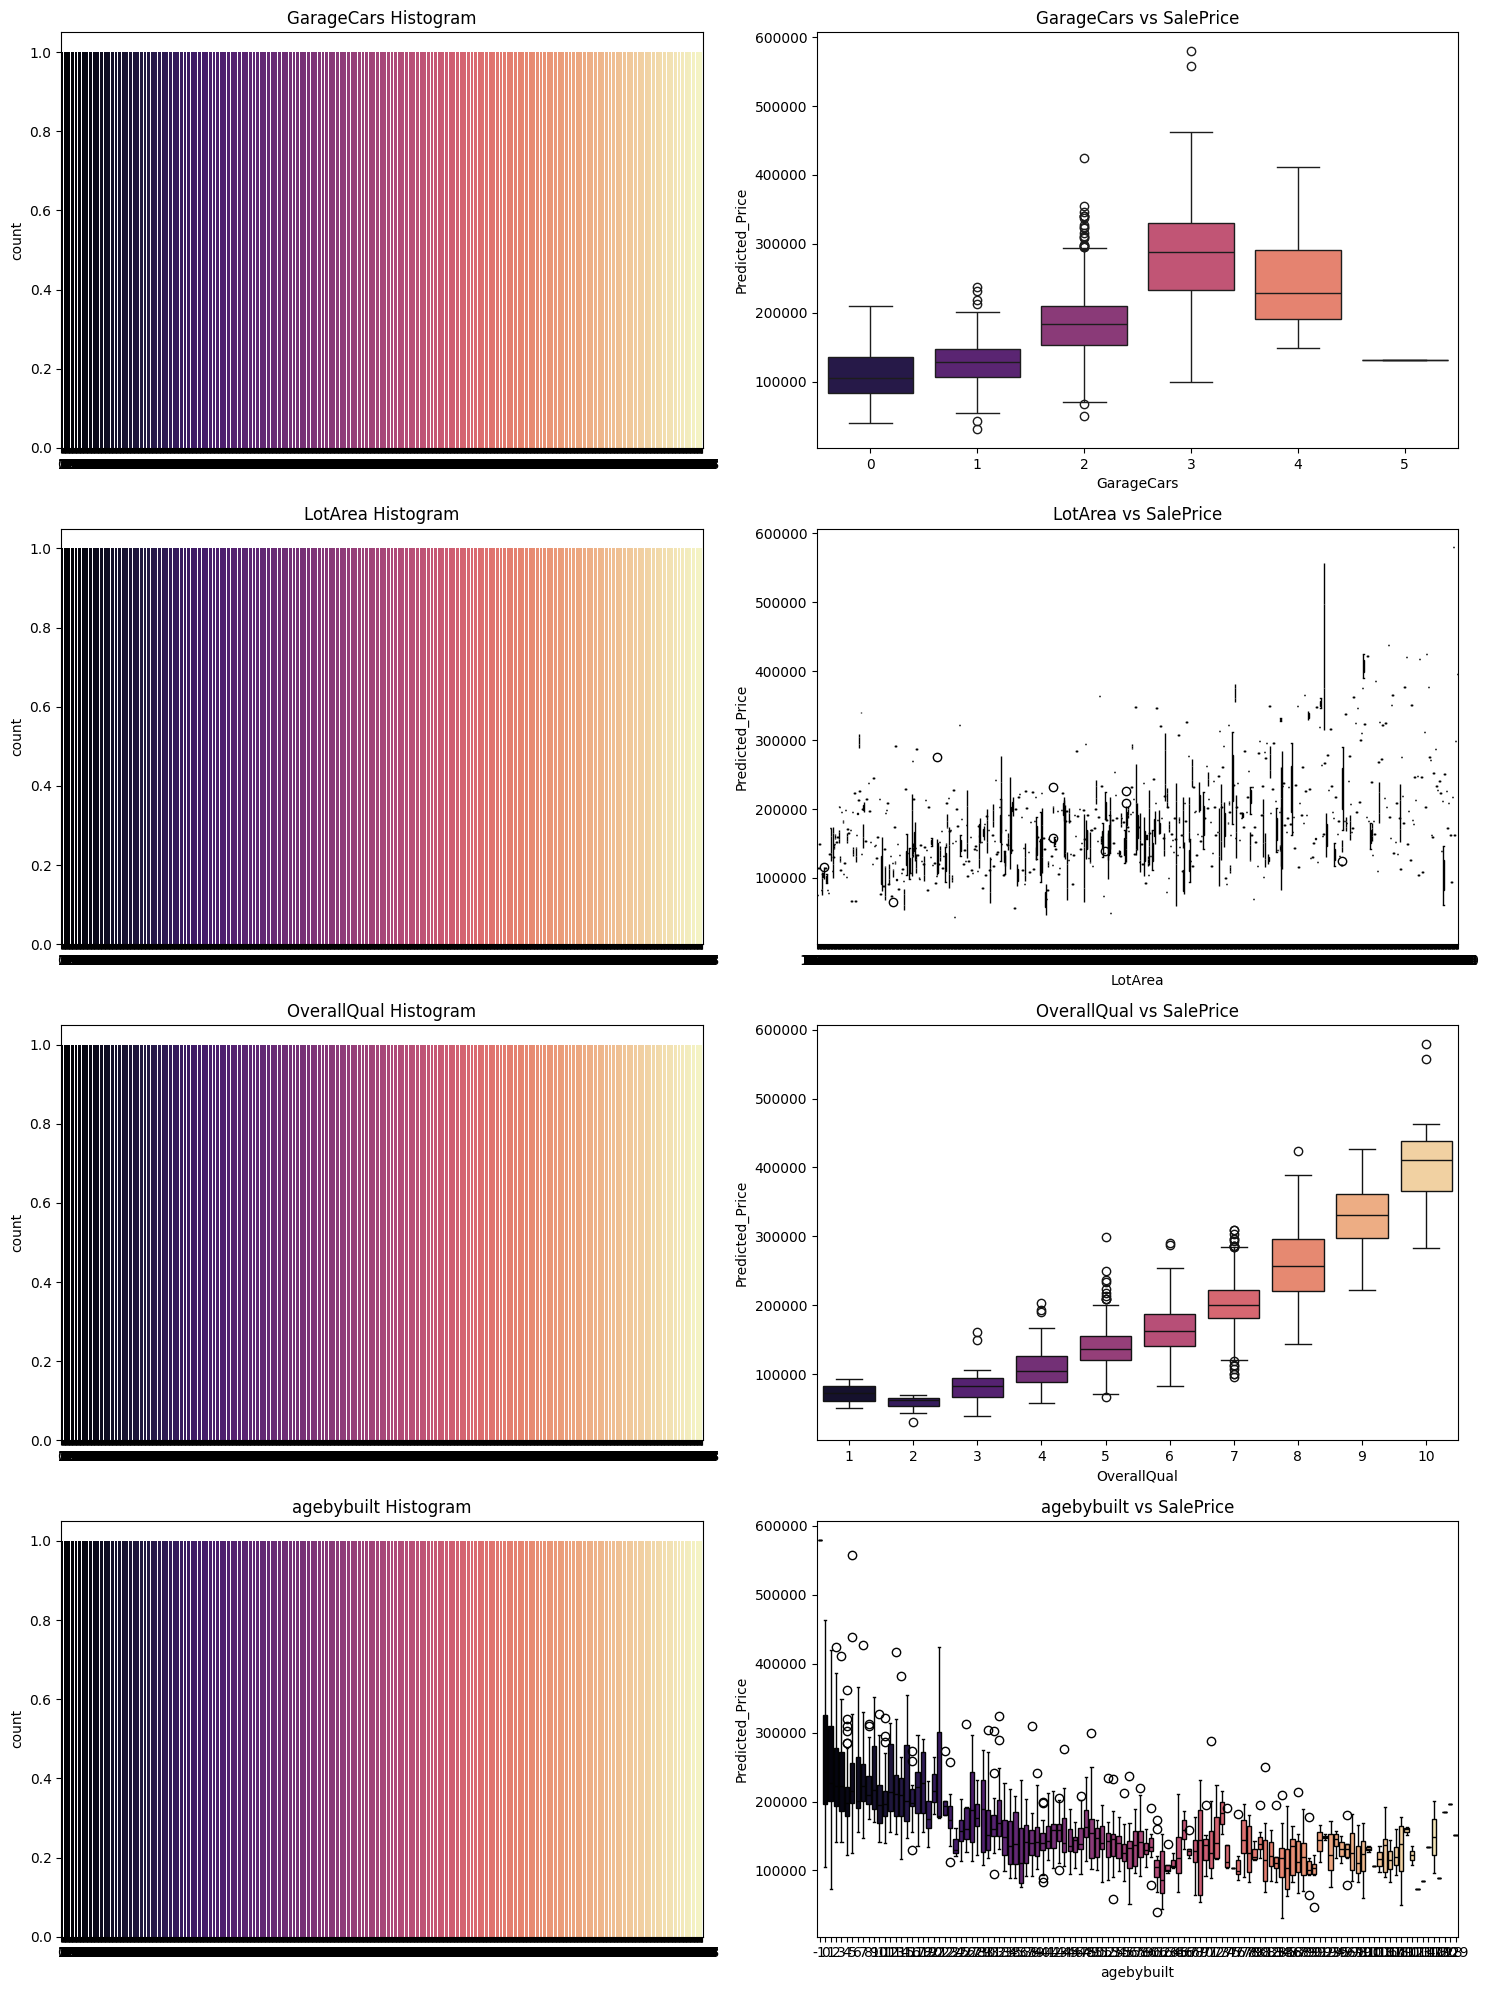

In [94]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(Pedicted_future[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs SalePrice')
    sns.boxplot(x=Pedicted_future[x], y=Pedicted_future.Predicted_Price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('GarageCars', 1)
plot_count('LotArea', 3)
plot_count('OverallQual', 5)
plot_count('agebybuilt', 7)

plt.tight_layout()

In [95]:
dfcheckpoint=Pedicted_future

In [96]:
dfcheckpoint.to_excel("Pedicted_future_data.xlsx", index=False)